## 2021 Visualizations

This notebook produces visualizations for the ACS standard dataframes for cities of interest. 

### Read in Data

In [39]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
import data_pipeline.spatial_operations as so
warnings.filterwarnings('ignore')

In [43]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2021.geojson"
    
#if os.path.exists("/tmp/data/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"
#else:
   # with zipfile.ZipFile('/tmp/data/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
     #   zip_ref.extractall('/tmp/data/')
    #ACS_2017_MERGED_FILE = "/tmp/data/standard_acs_censustract_df_2017.geojson"

In [44]:
# read in the files
#acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

### Check dimensions to see how many columns are in each dataframe

In [4]:
acs_2017_standard_df.shape

(9214, 273)

In [45]:
acs_2021_standard_df.shape

(10213, 274)

In [47]:
# drop random index column from dataframe
#acs_2017_standard_df.drop(columns=['Unnamed: 0'])
acs_2021_standard_df

,City,tract,state,county,STATEFP,COUNTYFP,Estimate!!Total: TOTAL POPULATION,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,...,Estimate!!Total: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,geometry
0,boston,373100,25.000000,17.000000,25,017,4875.0,0.427590,0.435590,0.863179,...,4866.000000,2662.000000,2204.000000,4866.000000,2662.000000,2204.000000,4866.000000,2662.000000,2204.000000,"POLYGON ((-71.19688 42.35413, -71.19686 42.354..."
1,boston,373500,25.000000,17.000000,25,017,6081.0,0.342789,0.349202,0.691991,...,6051.000000,3000.000000,3051.000000,6051.000000,3000.000000,3051.000000,6051.000000,3000.000000,3051.000000,"POLYGON ((-71.19953 42.34222, -71.19951 42.342..."
2,boston,373600,25.000000,17.000000,25,017,6840.0,0.304751,0.310453,0.615205,...,6820.000000,2955.000000,3865.000000,6820.000000,2955.000000,3865.000000,6820.000000,2955.000000,3865.000000,"POLYGON ((-71.19479 42.33038, -71.19467 42.331..."
3,boston,416102,25.000000,21.000000,25,021,4616.0,0.451581,0.460030,0.911612,...,4489.000000,1923.000000,2566.000000,4489.000000,1923.000000,2566.000000,4489.000000,1923.000000,2566.000000,"POLYGON ((-71.13072 42.22794, -71.13070 42.227..."
4,boston,400401,25.000000,21.000000,25,021,4345.0,0.479747,0.488723,0.968470,...,4345.000000,1987.000000,2358.000000,4345.000000,1987.000000,2358.000000,4345.000000,1987.000000,2358.000000,"POLYGON ((-71.13599 42.34537, -71.13546 42.345..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10208,washington-dc,7203,25.200000,41.400000,11,001,3121.8,0.745952,0.743527,1.489480,...,3112.800000,1689.200000,1423.600000,3112.800000,1689.200000,1423.600000,3112.800000,1689.200000,1423.600000,"POLYGON ((-77.00574 38.88085, -77.00517 38.880..."
10209,washington-dc,9510,8.500000,37.000000,11,001,4884.5,0.476756,0.475206,0.951962,...,4416.500000,2016.000000,2400.500000,4416.500000,2016.000000,2400.500000,4416.500000,2016.000000,2400.500000,"POLYGON ((-77.01086 38.94465, -77.01081 38.944..."
10210,washington-dc,9511,8.500000,37.000000,11,001,3091.5,0.753264,0.750814,1.504078,...,2788.000000,1123.000000,1665.000000,2788.000000,1123.000000,1665.000000,2788.000000,1123.000000,1665.000000,"POLYGON ((-77.00836 38.94136, -77.00832 38.941..."
10211,washington-dc,5503,7.400000,47.800000,11,001,3705.6,0.628431,0.626388,1.254819,...,3614.800000,1747.200000,1867.600000,3614.800000,1747.200000,1867.600000,3614.800000,1747.200000,1867.600000,"POLYGON ((-77.05595 38.90455, -77.05586 38.904..."


### Maps by City for 2017: "Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

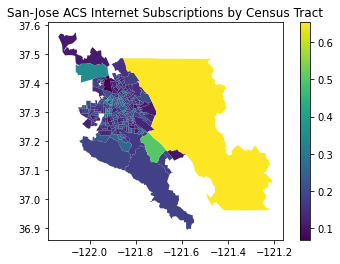

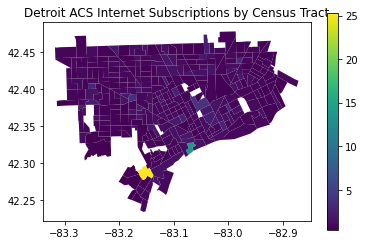

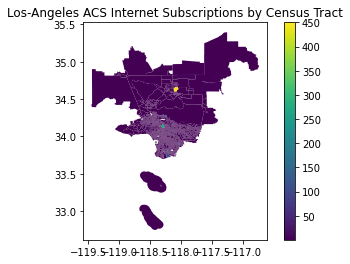

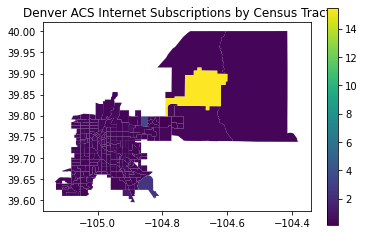

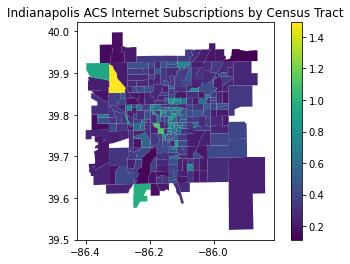

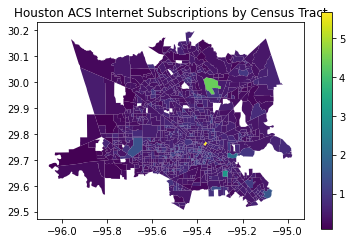

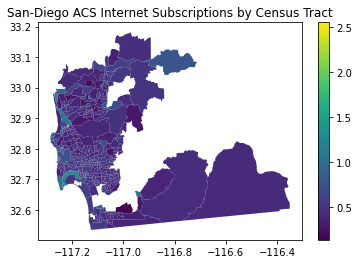

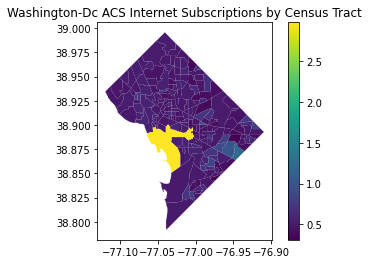

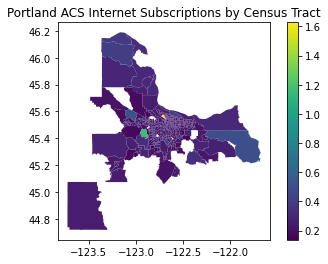

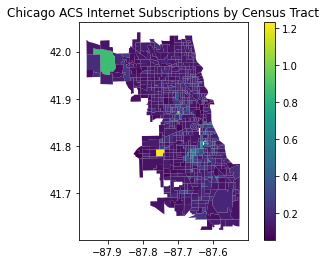

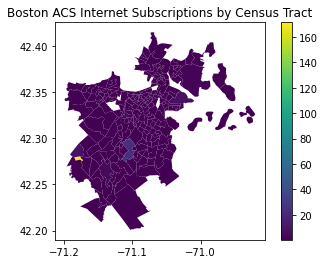

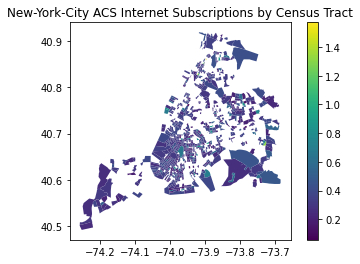

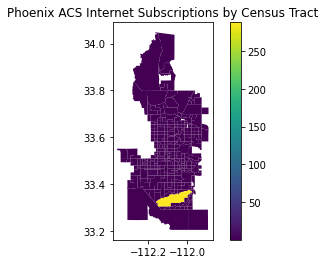

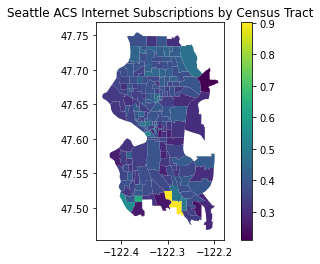

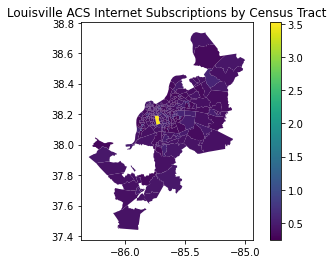

In [59]:
for city in set(acs_2017_standard_df['City']):
    city_df = acs_2017_standard_df[acs_2017_standard_df['City'] == city]
    so.simple_map(city_df.drop_duplicates(subset='tract'), 'PERC Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD', 
                  'tract', f'{city.title()} ACS Internet Subscriptions by Census Tract', f"/tmp/visualizations/{city}-acs-internet-tract-2017.png")

### Maps by City for 2021: "Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"

In [ ]:
for city in set(acs_2021_standard_df['City']):
    city_df = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    so.simple_map(city_df.drop_duplicates(subset='tract'), 'PERC Estimate!!Total: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD', 
                  'tract', f'{city.title()} ACS Internet Subscriptions by Census Tract', f"/tmp/visualizations/{city}-acs-internet-tract-2021.png")